# Random Forest 

**Importing necessary libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt

**Importing the preprocessed training dataset**

In [2]:
reviews_df = pd.read_csv("preprocessed_data_max.csv")

**The review and the review_clean feature are not of much importance here, so we will not consider them for training**

In [3]:
label = "is_bad_review"
ignore_cols = [label, "review", "review_clean"]
features = [c for c in reviews_df.columns if c not in ignore_cols]

X = reviews_df[features]
y = reviews_df[label]

In [4]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import make_scorer
scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score)}

**We will tune the model with the help of Holdout Validation. Creating a seperate validation dataset for the same**

In [5]:
X_train, X_val, y_train, y_val = train_test_split(X, y, random_state = 42, test_size = 0.2)

**We will see the effect of the depth of the trees in the random forest on the model AUC score. The total no of features considered by the Random Forest would be tested for both sqrt and log2 features**

In [18]:
depth = [10,20,30,40,50,60,70,80,90,100,110,120,130,140,150,160,170,180,190,200]
max_features = ['sqrt', 'log2']

**Training and validating the model based on AUC Score**

In [ ]:
auc_train_depth = {'sqrt' : [], 'log2' : []}
auc_test_depth = {'sqrt' : [], 'log2' : []}

for feature in max_features:
    for d in depth:
        rfc = RandomForestClassifier(max_depth= d, max_features= feature)
        rfc.fit(X_train, y_train)
        y1 = rfc.predict(X_train)
        auc_train = roc_auc_score(y_train, y1)
        auc_train_depth[feature].append(auc_train)
        y2 = rfc.predict(X_val)
        auc_val = roc_auc_score(y_val, y2)
        auc_test_depth[feature].append(auc_val)
        print(auc_train, auc_val)
    

**The results obtained are represented graphically**

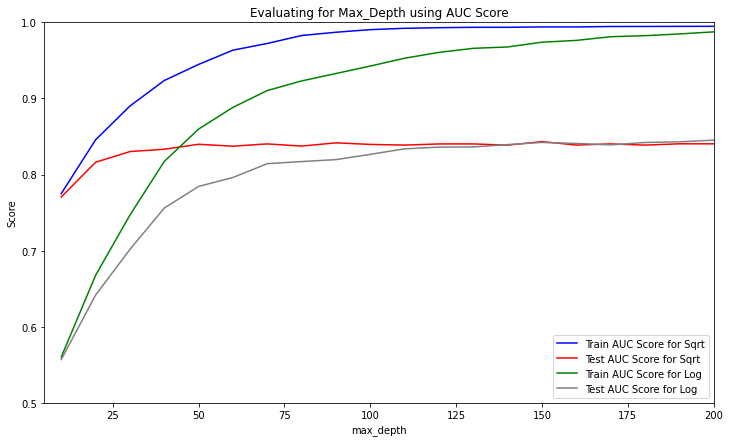

In [31]:
plt.figure(figsize=(12,7))
plt.title("Evaluating for Max_Depth using AUC Score",
          fontsize=12)


ax = plt.gca()
ax.set_xlim(5,200)
ax.set_ylim(0.5, 1)

plt.xlabel("max_depth")
plt.ylabel("Score")


mean_test_AUC_sqrt = []
mean_test_AUC_log2 = []
mean_train_AUC_sqrt = []
mean_train_AUC_log2 = []


plt.plot(depth, auc_train_depth['sqrt'], color = 'blue', label = 'Train AUC Score for Sqrt')
plt.plot(depth, auc_test_depth['sqrt'], color = 'red', label = 'Test AUC Score for Sqrt')

plt.plot(depth, auc_train_depth['log2'], color = 'green', label = 'Train AUC Score for Log')
plt.plot(depth, auc_test_depth['log2'], color = 'grey', label = 'Test AUC Score for Log')



plt.legend(loc="best")
plt.grid(False)
plt.show()

**We see that the the AUC Score increases rapidly with a small increase in depth of tree, but saturates at value of 100, representing slight overfitting. Though the extent of overfitting is almost negligible from AUC Score, we would restraint ourselves to use a max_depth value of around 100**

**Tuning of the n_estimators feature with the help of Holdout Validation**

In [ ]:
n_estimators = [5,10,15,20,40,80,120,160,200]
max_features = ['sqrt', 'log2']

auc_train_estimator = {'sqrt' : [], 'log2' : []}
auc_test_estimator = {'sqrt' : [], 'log2' : []}

for feature in max_features:
    for n_est in n_estimators:
        rfc = RandomForestClassifier(max_depth= 150, max_features= feature, n_estimators = n_est)
        rfc.fit(X_train, y_train)
        y1 = rfc.predict(X_train)
        auc_train = roc_auc_score(y_train, y1)
        auc_train_estimator[feature].append(auc_train)
        y2 = rfc.predict(X_val)
        auc_val = roc_auc_score(y_val, y2)
        auc_test_estimator[feature].append(auc_val)
        print(auc_train, auc_val)

**Representing the results graphically**

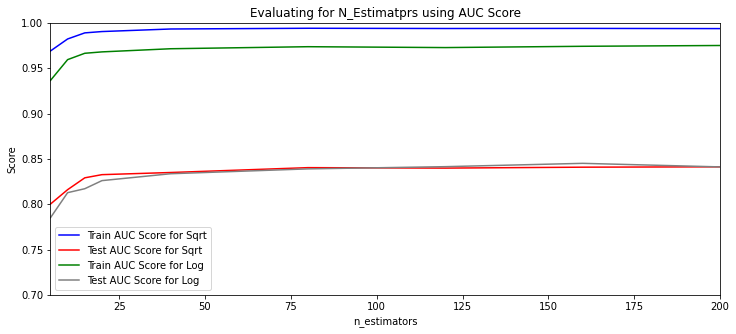

In [39]:
plt.figure(figsize=(12,5))
plt.title("Evaluating for N_Estimatprs using AUC Score",
          fontsize=12)


ax = plt.gca()
ax.set_xlim(5,200)
ax.set_ylim(0.7, 1)

plt.xlabel("n_estimators")
plt.ylabel("Score")


mean_test_AUC_sqrt = []
mean_test_AUC_log2 = []
mean_train_AUC_sqrt = []
mean_train_AUC_log2 = []


plt.plot(n_estimators, auc_train_estimator['sqrt'], color = 'blue', label = 'Train AUC Score for Sqrt')
plt.plot(n_estimators, auc_test_estimator['sqrt'], color = 'red', label = 'Test AUC Score for Sqrt')

plt.plot(n_estimators, auc_train_estimator['log2'], color = 'green', label = 'Train AUC Score for Log')
plt.plot(n_estimators, auc_test_estimator['log2'], color = 'grey', label = 'Test AUC Score for Log')



plt.legend(loc="best")
plt.grid(False)
plt.show()

**We observe a similar pattern again, the AUC score increasing for both Train and Validation Dataset, and then saturating, giving indications of overfitting**

**Based on these validation results, we can confidently say that the following hyperparameters would give us the best possible Random Forest Model**
<br>
**n_estimators : 100**
<br>
**max_features : log2**
<br>
**max_depth : 150**

**Training the model based on the chosen parameters**

In [ ]:
rfc = RandomForestClassifier(n_estimators= 100, max_features= 'log2', max_depth = 150)

In [ ]:
rfc.fit(X_train, y_train)

In [7]:
y1 = rfc.predict(X_train)

**Evaluating the results based on training data**

In [10]:
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, f1_score,  precision_score, recall_score

In [55]:
print(f'Accuracy : {accuracy_score(y_train, y1)}')
print(f'AUC Score : {roc_auc_score(y_train, y1)}')
print(f'F1 Score : {f1_score(y_train, y1)}')
print(f'Precision : {precision_score(y_train, y1)}')
print(f'Recall : {recall_score(y_train, y1)}')

Accuracy : 0.9783238636363636
AUC Score : 0.9738801091233753
F1 Score : 0.9725391398236457
Precision : 0.9952854511970534
Recall : 0.9508092892329345


**Evaluating the results based on validation data**

In [8]:
y2 = rfc.predict(X_val)

In [57]:
print(f'Accuracy : {accuracy_score(y_val, y2)}')
print(f'AUC Score : {roc_auc_score(y_val, y2)}')
print(f'F1 Score : {f1_score(y_val, y2)}')
print(f'Precision : {precision_score(y_val, y2)}')
print(f'Recall : {recall_score(y_val, y2)}')

Accuracy : 0.84875
AUC Score : 0.8400132212391522
F1 Score : 0.8113929431769874
Precision : 0.8332363213038417
Recall : 0.7906655619994477


**Comparing the Training and Validation Results**

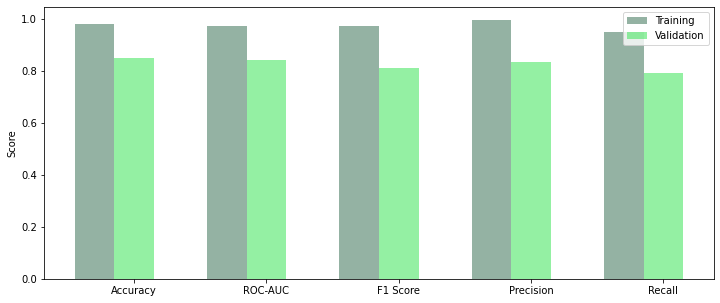

In [19]:
plt.figure(figsize=(12,5))
barWidth = 0.3

bars1 = [accuracy_score(y_train, y1), roc_auc_score(y_train, y1), f1_score(y_train, y1), precision_score(y_train, y1), recall_score(y_train, y1)]
bars2 = [accuracy_score(y_val, y2), roc_auc_score(y_val, y2), f1_score(y_val, y2), precision_score(y_val, y2), recall_score(y_val, y2)]
 
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
 
plt.bar(r1, bars1, width = barWidth, color = (0.3,0.5,0.4,0.6), capsize=7, label='Training')
 
plt.bar(r2, bars2, width = barWidth, color = (0.3,0.9,0.4,0.6), capsize=7, label='Validation')

plt.xticks([r + barWidth for r in range(len(bars1))], ['Accuracy', 'ROC-AUC', 'F1 Score', 'Precision', 'Recall'])
plt.ylabel('Score')
plt.legend(loc = 'best')
 
plt.show()


**Saving the trained Random Forest Model**

In [61]:
import joblib
joblib.dump(rfc, 'rfc.pkl', compress=1) 

['rfc.pkl']